In [3]:
# lista de planetas: posición x,y,x, velocidad x,y,z, masa
planetas = (
[0,0,100,-1,0,0,.001],
[10,0,100,-1,.005,0,.0005],
[0,0,0,.01,0,0,1]
);

In [4]:
function mover(planets,steps=2000,G=1) #funcion principal que va a hacer los calculos

    # esto crea un array para cada planeta en la lista, es para guardar las posiciones en cada tiempo
    lista=Array(Array,0)
    for i=1:length(planets)
        array=Array(Array,3)
        push!(lista,array)
        array[1]=Array(Number,0)
        array[2]=Array(Number,0)
        array[3]=Array(Number,0)
    end

    for fr=1:steps #estos son los steps de tiempo para los cuales calcularemos la poscion de cada planeta
        for i=1:length(planets)
            for ii=1:length(planets) # estos dos "for" se usaran para sacar la fuerza de cada planeta contra cada otro planeta
                if(i!=ii)#esto es para que un planeta no se cuente contra si mismo

                    #lo que sigue es obtener la fuerza de atraccion: F=G*(m1*m2)/(r^2)

                    rx=planets[ii][1]-planets[i][1] #esta es la componente x del vector de la distancia entre un planeta y el otro
                    ry=planets[ii][2]-planets[i][2]
                    rz=planets[ii][3]-planets[i][3]

                    r2=(rx*rx)+(ry*ry)+(rz*rz) #esto es al distancia al cuadrado: d=r^2=sqrt(rx^2+ry^2+rx^z)^2
                    r=sqrt(r2) #esto es la distancia: r
                    a=(G*planets[ii][7])/(r2) #esto es la fuerza ya multiplicada por la masa para sacar la aceleracion: F=ma -> a=G*m2/(r^2)
                    
                    
                    #esta parte es para encontrar las componentes x,y,z de la aceleracion,
                    # "a" es la magnitud y la dirrecion es igual a la del vector rx,ry,rz que teniamos
                    p=a/r
                    ax=a*rx
                    ay=a*ry
                    az=a*rz

                    planets[i][4]+=ax #vx: la nueva velocidad es igual a la velocidad que ya tenia mas la aceleracion a=cambio de velocida por unidad de tiempo 
                    planets[i][5]+=ay
                    planets[i][6]+=az
                end
            end

            planets[i][1]+=planets[i][4] #x: la nueva posicion es igual a la posicion que tenia mas la velocidad por ejemplo v=metros/segundo, cuantos metros por unidad de tiempo
            planets[i][2]+=planets[i][5]
            planets[i][3]+=planets[i][6]
        end
        for i=1:length(planets)
            #esto es para guardar las posiciones "x,y,z" actuales de los planetas antes de ir al siguiente step de tiempo, de modo que podamos graficar la trayectoria
            push!(lista[i][1],planets[i][1])
            push!(lista[i][2],planets[i][2])
            push!(lista[i][3],planets[i][3])
        end
    end
    lista
end

mover (generic function with 3 methods)

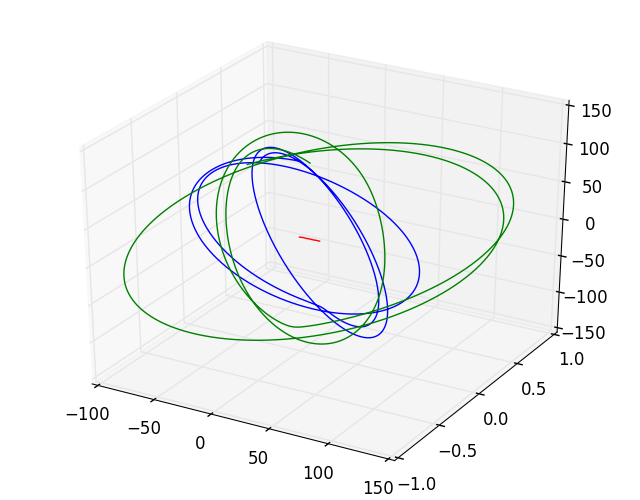

In [5]:
#usamos la funcion sobre el array de planetas y graficamos
lista=mover(planetas)
using PyPlot
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3])
end

In [8]:
# algunas datos reales del sistema solar
SistemaSolar=(
[5.628055933511824E+05,3.411843693775460E+05,-2.436386981035113E+04,
    -7.291599363100120E-04,1.210708994860029E-02,-1.869664697214633E-06,
    1.988544e+30,"Sol"
],
[-5.114900970348819E+07,-4.060852024612986E+07,1.373753734754255E+06,
    2.027956942186843E+01,-3.600051303471849E+01,-4.803191913645168E+00,
    3.302e+23,"Mercury"
],
[9.854679342419721E+07,4.646197811407988E+07,-5.046280202213528E+06,
    -1.502715063408101E+01,3.154566133521156E+01,1.299473506881935E+00,
    48.685e+23,"Venus"
],
[-1.048872226277378E+08,-1.076353288430656E+08,-1.961730794146657E+04,
    2.083297782408464E+01,-2.092328512963567E+01,1.528554128359616E-03,
    5.97219e+24,"Earth"
],
[-1.381194575492661E+08,-1.841909714269926E+08,-4.877476766278595E+05,
    2.027889587634121E+01,-1.246818497418936E+01,-7.592524395983373E-01,
    6.4185e+23,"Mars"
]
)
G=6.67408e-19 #Constante de gravitación universal, de modo que las unidades sean Kilometro, Kilogramo, segundo

6.67408e-20

esa info la saque de aqui http://ssd.jpl.nasa.gov/horizons.cgi pero no parece funcionar, creo que porque los numeros son muy grandes y el metodo de integracion es muy inexacto, talvez usando otras unidades mas naturales que no fueran km,s,Kg

aqui mencionan que tipo de integracion seria bueno usar https://www.physicsforums.com/threads/simulating-the-solar-system.512364/

dicen que esta https://www.google.com.mx/search?q=Adams+Bashforth+Moulton+integrator

tambien hay otro problema que si pruebas hacer el mismo calculo 2 veces da resultados diferentes aunque no cambies nada, me imagino que es por el error de la maquina pero esta muy raro que haga eso


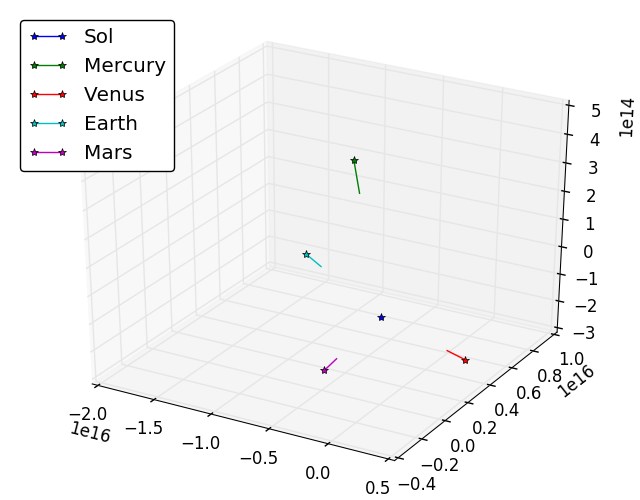

PyObject <matplotlib.legend.Legend object at 0x000000005573EAC8>

In [123]:
# test,aqui le cambie G para probar como se comporta
lista=mover(SistemaSolar,5*24*60*60,50.67408e-20)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],label=SistemaSolar[i][8],marker="*",markevery=[length(lista[i][1])-1])
end
legend(loc=2,fancybox="true")